#### BST 267: Introduction to Social and Biological Networks (2017)
# Homework 4

In this homework, you'll be using Python and NetworkX to explore the configuration model.


## Question 1
We will start by importing and visualizing the Florentine Families graph which is included as part of NetworkX. This is a classic dataset; look up online documentation about it and provide a brief 2-3 sentence description of the dataset below.

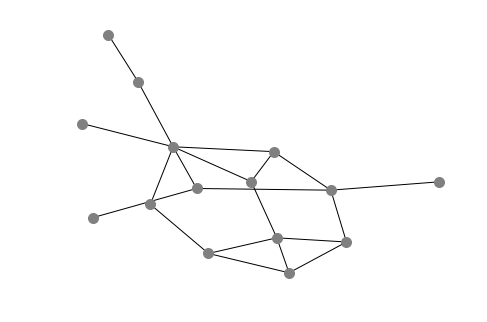

In [1]:
# run the code in this cell
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
G = nx.florentine_families_graph()
plt.figure()
nx.draw(G, node_color = "gray", node_size = 100)

**Insert your description of the dataset in the cell below**



This is a data set of marriage and business ties among Renaissance Florentine families.
Breiger & Pattison (1986), in their discussion of local role analysis, use a subset of data on the social relations among Renaissance Florentine families (person aggregates) collected by John Padgett from historical documents. The two relations are business ties (flobusiness - specifically, recorded financial ties such as loans, credits and joint partnerships) and marriage alliances (flomarriage). 
As Breiger & Pattison point out, the original data are symmetrically coded. This is acceptable perhaps for marital ties, but is unfortunate for the financial ties (which are almost certainly directed). To remedy this, the financial ties can be recoded as directed relations using some external measure of power - for instance, a measure of wealth. Both networks provide vertex information on (1) wealth each family's net wealth in 1427 (in thousands of lira); (2) priorates the number of priorates (seats on the civic council) held between 1282- 1344; and (3) totalties the total number of business or marriage ties in the total dataset of 116 families (see Breiger & Pattison (1986), p 239). 
Substantively, the data include families who were locked in a struggle for political control of the city of Florence in around 1430. Two factions were dominant in this struggle: one revolved around the infamous Medicis (9), the other around the powerful Strozzis (15) 

Extract the degree sequence of this graph as a list into a variable called `ds` and print it out. Also print out the degree sum for this sequence, i.e., the sum of the degrees of all nodes in the sequence (network) and confirm that it is even

In [2]:
##create list called ds with degree sequence and print
import numpy as np

ds = []
ds= list(dict(G.degree()).values())

print(ds)
##print out the degree sum of this sequence (so sum of the elements in  the ds list)
#confirm that it's even
print(np.sum(ds))

[1, 6, 3, 3, 4, 2, 3, 3, 3, 2, 1, 3, 4, 1, 1]
40


## Question 2

We will next implement our own configuration model. Although NetworkX has an existing function for this, which also also included in the lecture slides, you should not use it in this exercise. Coding up the model yourself will help you understand the model. Write a function called `cfmodel` that takes as its input a degree sequence called `ds` and returns one graph realization from the configuration model ensemble defined by the given degree sequence. Note that the configuration model can produce self-edges and multiedges, so to allow for these structures in a NetworkX graph object, you should create your graph using `nx.MultiGraph()` rather than `nx.Graph()`. The node IDs of the generated random graph should range from `0` to `n-1` for a degree sequence of length `n`. To generate a random matching, one option is to use `random.shuffle` that shuffles a list in place. As usual, consult online documentation as needed.

In [3]:
#implement configuration model
import random as random
def cfmodel(ds):   
    N = len(ds)
    M = nx.MultiGraph()
    M.add_nodes_from(range(N))
    stublist = []
    for n in M:
        for i in range(ds[n]):
            stublist.append(n)
    while sum(stublist) > 1:
        np.random.shuffle(stublist)
        n1 = stublist.pop()
        n2 = stublist.pop()
        M.add_edge(n1,n2)
    return(M)

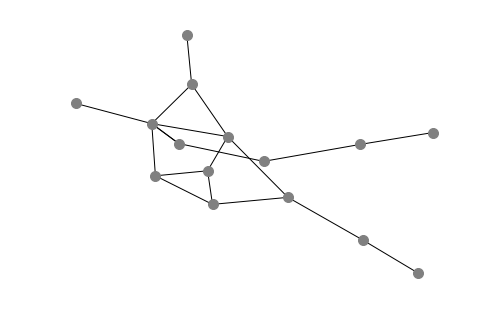

In [4]:
#test cfmodel
M = cfmodel(ds)
nx.draw(M, node_color = "gray", node_size = 100)

## Question 3

Call your `cfmodel` function in a `for` loop 16 times to generate 16 (likely) different realizations of the configuration model using the Florentine Families degree sequence as the input to your function. If your `cfmodel` function appears not to work, you can use the built-in version of the model in NetworkX, in which case you should consult online documentation on how to use it. Use `plt.subplot` to draw the visualizations in a 4 rows x 4 columns figure, where each panel shows one network realization.

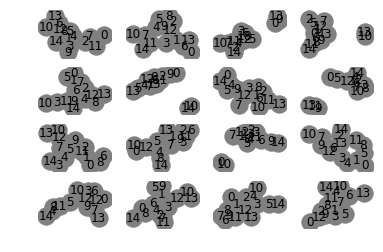

In [5]:
def generate_and_plot(k): 
    plt.subplot(4,4,k)
    G = cfmodel(ds)
    nx.draw(G, node_color="gray", with_labels=True) 

plt.figure()
for k in range(1,17):
    generate_and_plot(k)


## Question 4

The above random graphs should look pretty similar to one another since they've been drawn from the same configuration model random graph ensemble. We're now going to examine the number of triangles in a collection of random graphs generated with this model. Note that while the model does preserve the number of edges in any realized graph, each graph realization can potentially have a different number of triangles (closed triads). Our configuration model graph objects are of type `MultiGraph` whereas the function for counting triangles, `nx.triangles`, takes an object of type `Graph` as its input. You can convert your multigraph `H` to a simple graph using `nx.Graph(H)`.

Print out the number of triangles in the observed (the actual) Florentine Families graph. Then use your `cfmodel` function to generate 10,000 different realizations of the configuration model using the Florentine Families graph degree sequence. If your `cfmodel` function appears not to work, you can use the built-in version of the model in NetworkX. Plot a histogram of the number of triangles in the simulated graphs. How does the number of triangles in the observed network compare with the number of triangles generated in a typical realization of the configuration model? Finally, what is the probability, estimated from the 10,000 network realizations, for the configuration model to generate as many or more triangles than are present in the observed graph?

In [6]:
#Print out the number of triangles in the observed Florentine Families graph. 
G = nx.florentine_families_graph()
nx.Graph(G)
print(np.sum(nx.triangles(G).values()))
print(np.sum(list(nx.triangles(G).values()))/3)

dict_values([0, 1, 1, 2, 2, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])
3.0


Text(0,0.5,'Count')

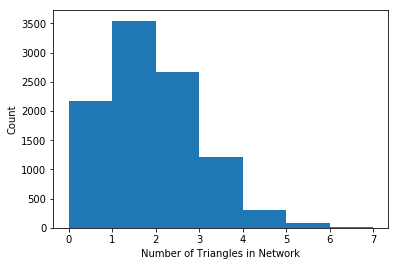

In [7]:

#cfmodel function to generate 10,000 different realizations of the configuration model 
#using the Florentine Families graph degree sequence

triangle_sum = []

for k in range(1,10000):  
    G = cfmodel(ds)
    simple = nx.Graph(G)
    triangle_sum.append(sum(list(nx.triangles(simple).values()))/3)

#plotting the histogram
plt.hist(x=triangle_sum, bins = 7)
plt.xlabel('Number of Triangles in Network')  
plt.ylabel('Count')  



### How does the number of triangles in the observed network compare with the number of triangles generated in a typical realization of the configuration model? 

The observed network has 3 triangles, while the typical realization of the configuration model has fewer than 3. Simply looking at the average of the outputs, one can see that on average, the number of triangle in a typical realization is between 1 and 2. 



In [8]:
print(np.mean(triangle_sum))

1.42214221422


### What is the probability, estimated from the 10,000 network realizations, for the configuration model to generate as many or more triangles than are present in the observed graph?

In [9]:
print((sum(i >= 3 for i in triangle_sum)/10000))

0.1609
